[![](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/ganegroup/workshop_nn/blob/main/08c_AlexNet.ipynb)

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow_datasets as tfds
import numpy as np
import seaborn as sns
sns.set_theme()

2023-07-02 15:06:43.780099: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.config.list_physical_devices()

2023-07-02 15:06:45.492298: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-02 15:06:45.495424: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-02 15:06:45.495537: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from tensorflow.keras.regularizers import l2

In [4]:
def create_AlexNet(input_shape=[227, 227, 3], num_classes=1000, activation="relu", pooling_layer=layers.MaxPooling2D, batch_normalization=True, kernel_regularizer=l2(5e-4)):
    """Create a keras sequencial model based on the AlexNet architecture"""

    if input_shape == [227, 227, 3]:
        first_kernel_size = 11
        pool_size = 3
    else:
        first_kernel_size = 3
        pool_size = 2

    model = Sequential()
    
    model.add(layers.Conv2D(filters=96, kernel_size=first_kernel_size, strides=4, activation=activation, padding="valid", input_shape=input_shape))
    model.add(pooling_layer(pool_size=pool_size, strides=2, padding="valid"))
    if batch_normalization:
        model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(filters=256, kernel_size=5, strides=1, activation=activation, padding="same", kernel_regularizer=kernel_regularizer))
    model.add(pooling_layer(pool_size=pool_size, strides=2, padding="valid"))
    if batch_normalization:
        model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(filters=384, kernel_size=3, strides=1, activation=activation, padding="same", kernel_regularizer=kernel_regularizer))
    if batch_normalization:
        model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(filters=384, kernel_size=3, strides=1, activation=activation, padding="same", kernel_regularizer=kernel_regularizer))
    if batch_normalization:
        model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(filters=256, kernel_size=3, strides=1, activation=activation, padding="same", kernel_regularizer=kernel_regularizer))
    if batch_normalization:
        model.add(layers.BatchNormalization())

    model.add(pooling_layer(pool_size=pool_size, strides=2, padding="valid"))

    model.add(layers.Flatten())

    model.add(layers.Dense(units=4096, activation=activation))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(units=4096, activation=activation))
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(units=num_classes, activation="softmax"))

    return model

In [5]:
def create_AlexNet(input_shape=[227, 227, 3], num_classes=1000, activation="relu", pooling_layer=layers.MaxPooling2D, batch_normalization=True, kernel_regularizer=l2(5e-4)):
    """Create a keras sequencial model based on the AlexNet architecture"""

    model = Sequential()
    
    model.add(layers.Conv2D(filters=16, kernel_size=2, activation=activation, padding="same", input_shape=input_shape))
    model.add(pooling_layer(pool_size=2, strides=2, padding="valid"))

    model.add(layers.Conv2D(filters=32, kernel_size=2, strides=1, activation=activation, padding="same", kernel_regularizer=kernel_regularizer))
    model.add(pooling_layer(pool_size=2, strides=2, padding="valid"))

    model.add(layers.Conv2D(filters=64, kernel_size=2, strides=1, activation=activation, padding="same", kernel_regularizer=kernel_regularizer))
    model.add(pooling_layer(pool_size=2, strides=2, padding="valid"))

    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())

    model.add(layers.Dense(units=500, activation=activation))
    model.add(layers.Dropout(0.4))
    
    model.add(layers.Dense(units=num_classes, activation="softmax"))

    return model

In [6]:
num_classes = 10


AlexNet = create_AlexNet(input_shape=[32, 32, 3], num_classes=num_classes, batch_normalization=False, kernel_regularizer=None)

AlexNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

2023-07-02 15:06:45.551716: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-02 15:06:45.551911: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-02 15:06:45.552019: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [7]:
# Data loading and preprocessing

(train_data, validation_data), info = tfds.load('cifar10', split=["train", "test"], with_info=True, as_supervised=True)

In [8]:
info

tfds.core.DatasetInfo(
    name='cifar10',
    full_name='cifar10/3.0.2',
    description="""
    The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_path='/home/user/tensorflow_datasets/cifar10/3.0.2',
    file_format=tfrecord,
    download_size=162.17 MiB,
    dataset_size=132.40 MiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=string),
        'image': Image(shape=(32, 32, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=50000, num_shards=1>,
    },
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {

In [9]:
def normalize(image, label):
    """ Normalize image: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255., label

def to_categorical(image, label):
    return image, tf.one_hot(tf.cast(label, tf.int32), num_classes)

def pipeline(dataset):
    dataset = dataset.map(normalize)
    dataset = dataset.map(to_categorical)
    dataset = dataset.cache()
    dataset = dataset.shuffle(info.splits['train[:75%]'].num_examples)
    return dataset

processed_train_data = pipeline(train_data)
processed_validation_data = pipeline(validation_data)

batch_size = 32

batched_train_data = processed_train_data.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
batched_validation_data = processed_validation_data.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
lr_reducer = ReduceLROnPlateau(monitor="val_loss", factor=np.sqrt(0.1), patience=5)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

AlexNet.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [11]:
normalization_layer = layers.Normalization(axis=None)
normalization_layer.adapt(processed_train_data.map(lambda x, y: x))

2023-07-02 15:06:46.255551: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [1]
	 [[{{node Placeholder/_2}}]]
2023-07-02 15:06:46.255812: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [1]
	 [[{{node Placeholder/_1}}]]


In [12]:
data_augmentation = Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomZoom((-0.2, 0.2)),
  layers.RandomTranslation(
    (-0.1, 0.1), (-0.1, 0.1)
  ),
  layers.RandomRotation(0.2),
])

In [13]:
batched_train_data = processed_train_data.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
batched_validation_data = processed_validation_data.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)


batched_train_data = batched_train_data.map(lambda x, y: (normalization_layer(x), y))
batched_train_data = batched_train_data.map(lambda x, y: (data_augmentation(x), y))

batched_validation_data = batched_validation_data.map(lambda x, y: (normalization_layer(x), y))

2023-07-02 15:07:08.099652: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_43' with dtype resource
	 [[{{node Placeholder/_43}}]]
2023-07-02 15:07:08.100052: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_38' with dtype float and shape [1,1,1]
	 [[{{node Placeholder/_38}}]]


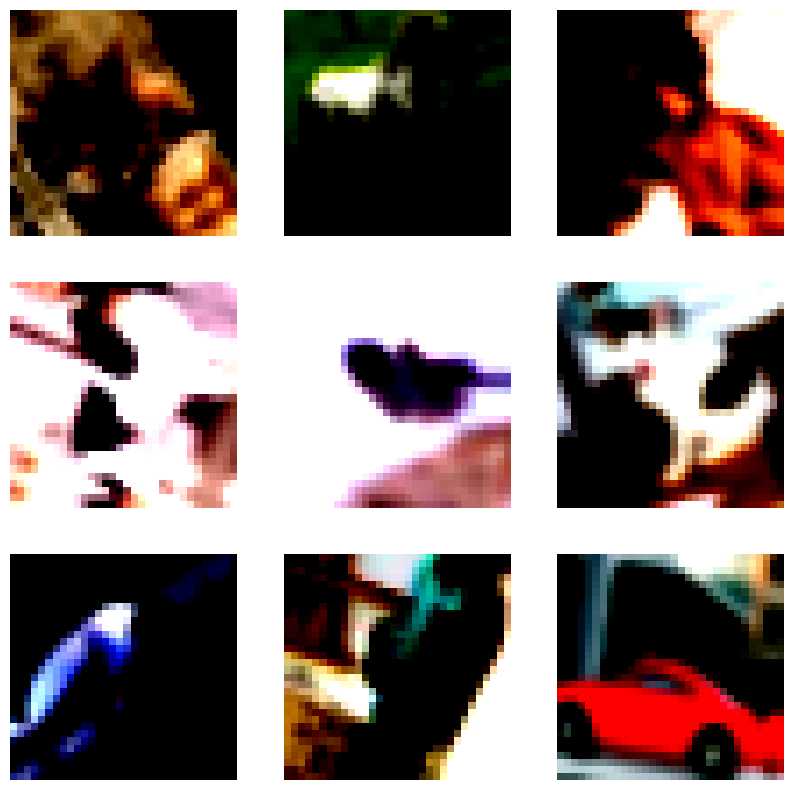

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, _ in batched_train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.axis("off")

In [15]:
history = AlexNet.fit(
    batched_train_data,
    epochs=100,
    validation_data=batched_validation_data,
    callbacks=[lr_reducer]
)

Epoch 1/100


2023-07-02 15:07:08.714994: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_44' with dtype resource
	 [[{{node Placeholder/_44}}]]
2023-07-02 15:07:08.715344: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [1]
	 [[{{node Placeholder/_4}}]]
2023-07-02 15:07:09.112751: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-07-02 15:07:09.767025: I tensorflow/compiler/xla/stream_ex

1563/1563 [==============================] - ETA: 0s - loss: 1.8379 - accuracy: 0.3296

2023-07-02 15:07:18.759445: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [1]
	 [[{{node Placeholder/_3}}]]
2023-07-02 15:07:18.759739: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [1]
	 [[{{node Placeholder/_3}}]]


1563/1563 [==============================] - 11s 5ms/step - loss: 1.8379 - accuracy: 0.3296 - val_loss: 1.5740 - val_accuracy: 0.4312 - lr: 0.0100
Epoch 2/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6586 - accuracy: 0.3960 - val_loss: 1.6459 - val_accuracy: 0.4111 - lr: 0.0100
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5927 - accuracy: 0.4222 - val_loss: 1.5976 - val_accuracy: 0.4421 - lr: 0.0100
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5450 - accuracy: 0.4392 - val_loss: 1.4352 - val_accuracy: 0.4795 - lr: 0.0100
Epoch 5/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5148 - accuracy: 0.4506 - val_loss: 1.4052 - val_accuracy: 0.4932 - lr: 0.0100
Epoch 6/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4936 - accuracy: 0.4599 - val_loss: 1.4573 - val_accuracy: 0.4769 - lr: 0.0100
Epoch 7/100
1563/1563 [==============================] - 8s 5ms

<Axes: >

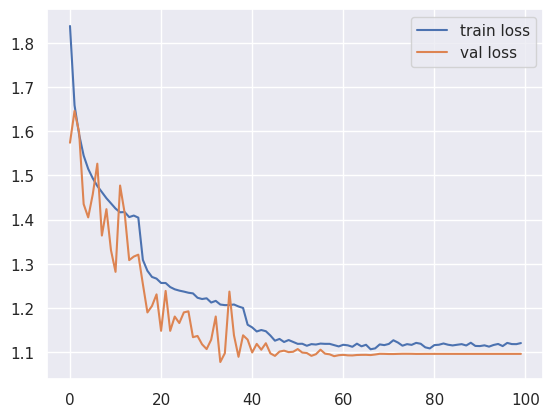

In [16]:
sns.lineplot(x=history.epoch, y=history.history['loss'], label="train loss")
sns.lineplot(x=history.epoch, y=history.history['val_loss'], label="val loss")

<Axes: >

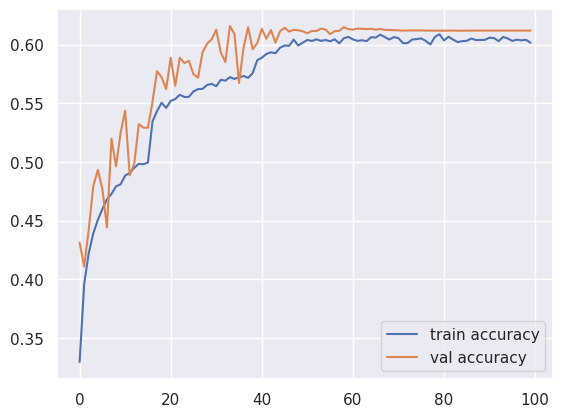

In [17]:
sns.lineplot(x=history.epoch, y=history.history['accuracy'], label="train accuracy")
sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], label="val accuracy")